In [1]:
#For Kaggle
#date=''

#For WL data
source='WL'
date='20241118'

saveImage=False

print('done')

done


In [2]:
import sys
import os
from importlib import reload
fpath = os.path.join('..//scripts')
sys.path.append(fpath)

import warnings
warnings.filterwarnings('ignore')

#loading internal scripts
import frauddetection as fd
import sourcedata as sd
import dataimport as di
import result as resultMd
reload(fd)
reload(sd)
reload(di)
reload(resultMd)

print('done')

done


In [3]:
import pandas as pd

dfTrx = pd.read_csv('../data/cleaned/'+source+'export'+date+'.csv')
dfTrx.head(5)

,db_uuid,trx_date_time,term_mcc,term_country,mcd_fraud_score,vaa_score,card_pan_id,Class,ecom,card_brand_MCD,...,clusterCardHolder_cluster3,clusterCardHolder_cluster4,clusterMerchant_M0,clusterMerchant_M1,clusterMerchant_M2,clusterMerchant_M3,clusterMerchant_UNKNOWN,trx_amount_log10,previous_trx,distancePrevTrx
0,31BD8D38A53C11EFABA49D2778D26ADA,2024-11-18 00:29:22,5499,NLD,214.000000,26.258093,450280D96024C965163D7F15687156B138E1BDCB6DC512...,0,1,1,...,0,0,1,0,0,0,0,1.690107,0,1.1
1,A3E698CEA53B11EFABA49D2778D26ADA,2024-11-18 00:27:12,5499,NLD,225.222235,32.000000,68B7CAD29BF263AD2CE80B155DD3D3EE783884F72F7070...,0,1,0,...,0,0,1,0,0,0,0,1.799272,0,1.1
2,C5D7AAE6A53A11EFAAA0DF784AB5695E,2024-11-18 00:20:15,7011,BEL,152.000000,26.258093,02587C2F031D3D22C997A9A4E6CB78D6A87A2C73E61131...,0,1,1,...,0,0,0,0,0,1,0,1.374015,0,1.0
3,9C87AE3EA53F11EFABA49D2778D26ADA,2024-11-18 00:53:48,5542,BEL,225.222235,26.258093,CD32793A75DE03806C854CB3B6C2DF5BB2809C2DA66BA9...,0,1,0,...,0,1,0,0,0,1,0,1.205204,0,1.0
4,9C87B0B4A53F11EFABA49D2778D26ADA,2024-11-18 00:53:48,5542,BEL,225.222235,26.258093,CD32793A75DE03806C854CB3B6C2DF5BB2809C2DA66BA9...,0,1,0,...,0,1,0,0,0,1,0,1.205204,0,1.1


# Test with default hyperparameters

Duration  9.158384
test-set confusion matrix:
 [[211711     11]
 [   230     18]]
accuracy score: 0.9989
balanced accuracy score: 0.5363
recall score: 0.0726
precision score: 0.6207
f1 score: 0.1300
mcc score: 0.2120
roc auc score: 0.5363
test-set confusion matrix:
 [[846872     13]
 [   800    194]]
accuracy score: 0.9990
balanced accuracy score: 0.5976
recall score: 0.1952
precision score: 0.9372
f1 score: 0.3231
mcc score: 0.4275
roc auc score: 0.5976
test-set confusion matrix:
 [[211711     11]
 [   230     18]]
accuracy score: 0.9989
balanced accuracy score: 0.5363
recall score: 0.0726
precision score: 0.6207
f1 score: 0.1300
mcc score: 0.2120
roc auc score: 0.5363


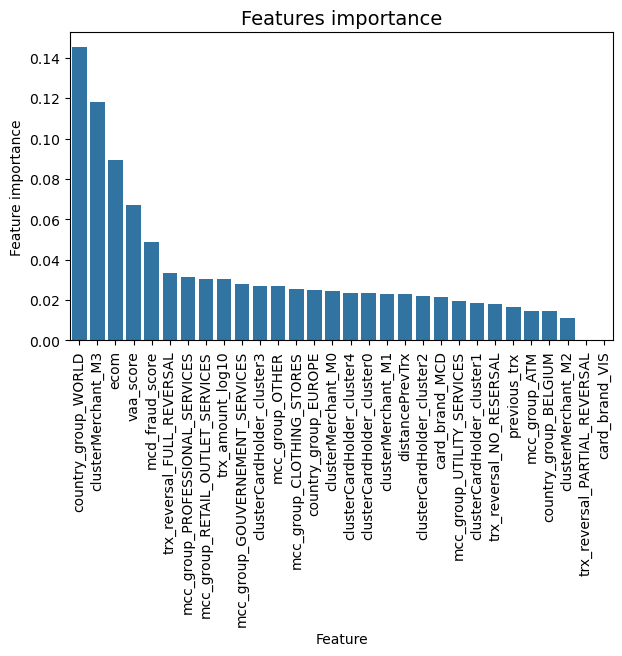

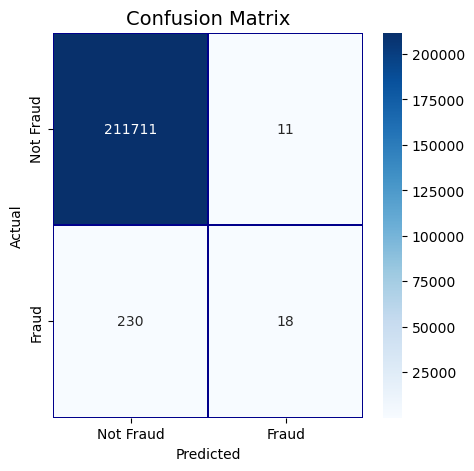

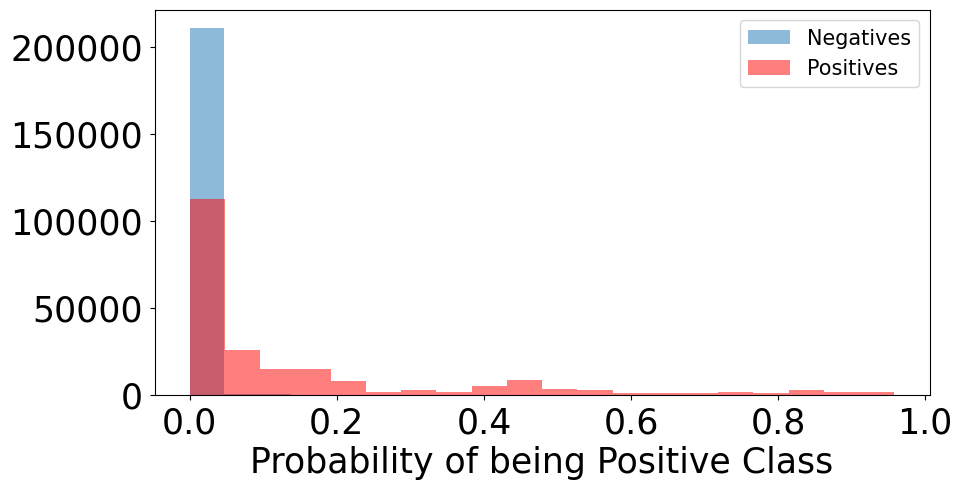

In [5]:
import xgboost as xgb
import matplotlib.pyplot as plt
from datetime import datetime

then= datetime.now()
predictors = fd.getPredictors(dfTrx)

x_train, x_test, y_train, y_test, scaler =fd.split_data(dfTrx,predictors)

modelClf = xgb.XGBClassifier()
modelClf.fit(x_train, y_train)
predsTrain = modelClf.predict(x_train)
predsTest = modelClf.predict(x_test)

now = datetime.now()
duration= now - then
duration_in_s = duration.total_seconds()
print("Duration ",duration_in_s)
resultMd.update_time_response_result('08-xgboost','XGBClassifier','1-Default', duration_in_s)
f1,mcc,roc=fd.print_scores(y_test, predsTest,'all')
resultMd.update_performance_test_result('08-xgboost','XGBClassifier','1-Default', f1,mcc,roc)

fd.print_scores(y_train, predsTrain,'f1', False)
fd.print_scores(y_test, predsTest,'f1')
fd.show_importance(modelClf, predictors)
fd.show_confusion_matrix(y_test, predsTest)
fd.show_prediction_graph(modelClf, x_test,y_test)


Duration  51.763148
test-set confusion matrix:
 [[211679     43]
 [   215     33]]
accuracy score: 0.9988
balanced accuracy score: 0.5664
recall score: 0.1331
precision score: 0.4342
f1 score: 0.2037
mcc score: 0.2399
roc auc score: 0.5664
test-set confusion matrix:
 [[846853     32]
 [   244    750]]
accuracy score: 0.9997
balanced accuracy score: 0.8772
recall score: 0.7545
precision score: 0.9591
f1 score: 0.8446
mcc score: 0.8505
roc auc score: 0.8772
test-set confusion matrix:
 [[211679     43]
 [   215     33]]
accuracy score: 0.9988
balanced accuracy score: 0.5664
recall score: 0.1331
precision score: 0.4342
f1 score: 0.2037
mcc score: 0.2399
roc auc score: 0.5664


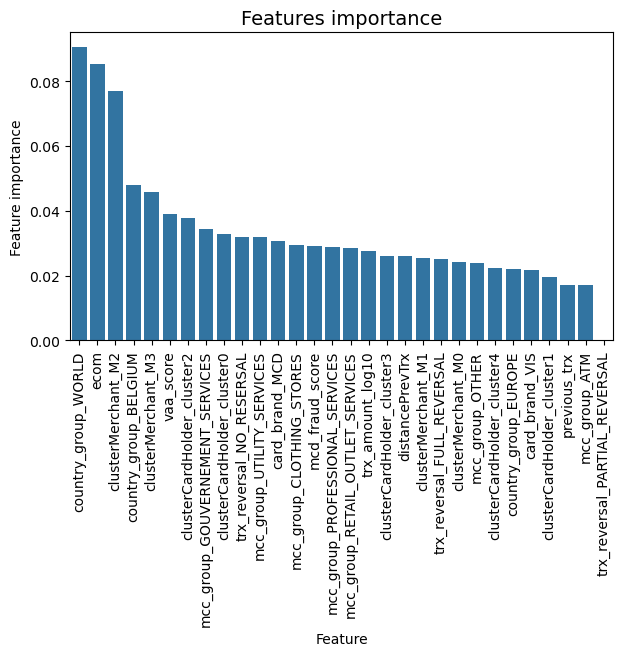

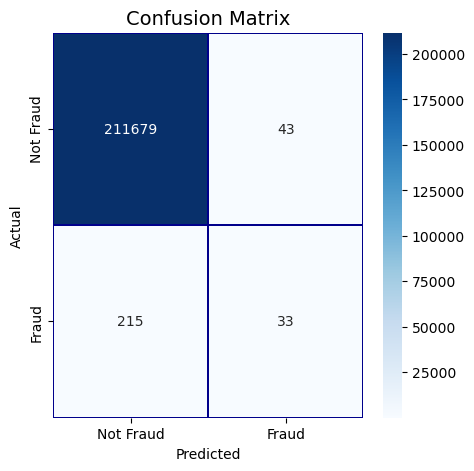

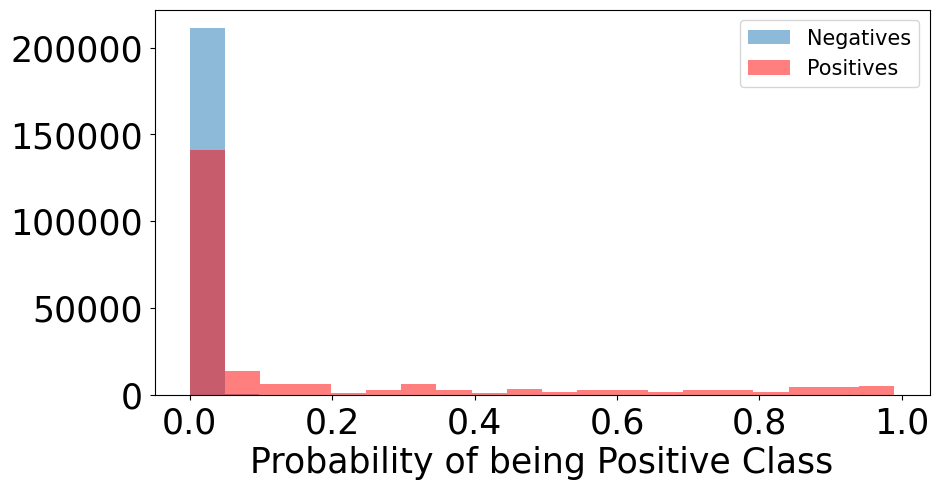

In [6]:
import xgboost as xgb
import matplotlib.pyplot as plt
from datetime import datetime

then= datetime.now()
predictors = fd.getPredictors(dfTrx)

x_train, x_test, y_train, y_test, scaler =fd.split_data(dfTrx,predictors)
parameters= {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 11, 'n_estimators': 330, 'subsample': 0.8}


modelClf = xgb.XGBClassifier()
modelClf.set_params(**parameters)
modelClf.fit(x_train, y_train)
predsTrain = modelClf.predict(x_train)
predsTest = modelClf.predict(x_test)

now = datetime.now()
duration= now - then
duration_in_s = duration.total_seconds()
print("Duration ",duration_in_s)
resultMd.update_time_response_result('08-xgboost','XGBClassifier','2-After tuning', duration_in_s)
f1,mcc,roc=fd.print_scores(y_test, predsTest,'all')
resultMd.update_performance_test_result('08-xgboost','XGBClassifier','2-After tuning', f1,mcc,roc)

fd.print_scores(y_train, predsTrain,'f1', False)
fd.print_scores(y_test, predsTest,'f1')
fd.show_importance(modelClf, predictors)
fd.show_confusion_matrix(y_test, predsTest)
fd.show_prediction_graph(modelClf, x_test,y_test)


# Threshold management

--- threshold -- 0.025
test-set confusion matrix:
 [[210960    762]
 [   146    102]]
accuracy score: 0.9957
balanced accuracy score: 0.7038
recall score: 0.4113
precision score: 0.1181
f1 score: 0.1835
mcc score: 0.2187
roc auc score: 0.7038
--- threshold -- 0.05
test-set confusion matrix:
 [[211295    427]
 [   165     83]]
accuracy score: 0.9972
balanced accuracy score: 0.6663
recall score: 0.3347
precision score: 0.1627
f1 score: 0.2190
mcc score: 0.2321
roc auc score: 0.6663
--- threshold -- 0.1
test-set confusion matrix:
 [[211501    221]
 [   182     66]]
accuracy score: 0.9981
balanced accuracy score: 0.6325
recall score: 0.2661
precision score: 0.2300
f1 score: 0.2467
mcc score: 0.2464
roc auc score: 0.6325
--- threshold -- 0.2
test-set confusion matrix:
 [[211605    117]
 [   195     53]]
accuracy score: 0.9985
balanced accuracy score: 0.6066
recall score: 0.2137
precision score: 0.3118
f1 score: 0.2536
mcc score: 0.2574
roc auc score: 0.6066
--- threshold -- 0.3
test-set con

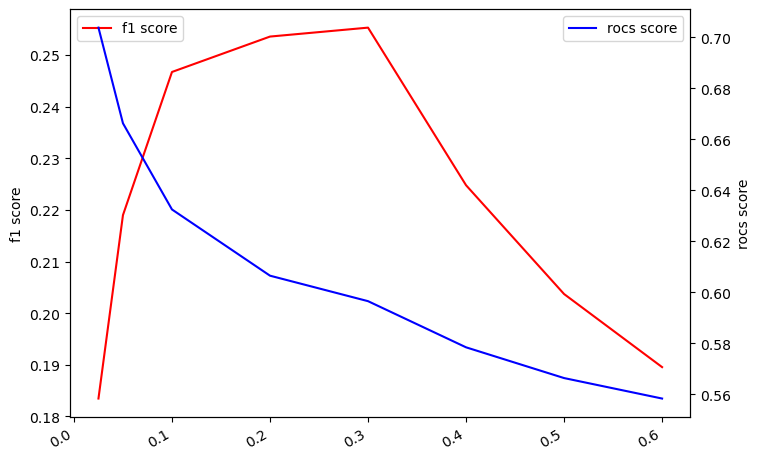

In [20]:
y_pred_prob = modelClf.predict_proba(x_test)[:,1]

range = []
f1s = []
rocs = []
for threshold  in [0.025,0.05,0.1,0.2,0.3,0.4,0.5,0.6]:
    print("--- threshold --", threshold)
    y_pred_adjusted = (y_pred_prob>threshold).astype(int)
    f1,mcc,roc=fd.print_scores(y_test, y_pred_adjusted,'all')
    range.append(threshold)
    f1s.append(f1)
    rocs.append(roc)

fd.plt_train_test(range, f1s,"f1 score",rocs,"rocs score")


export20241118.csv
test-set confusion matrix:
 [[1058567      40]
 [    544     698]]
accuracy score: 0.9994
balanced accuracy score: 0.7810
recall score: 0.5620
precision score: 0.9458
f1 score: 0.7051
mcc score: 0.7288
roc auc score: 0.7810


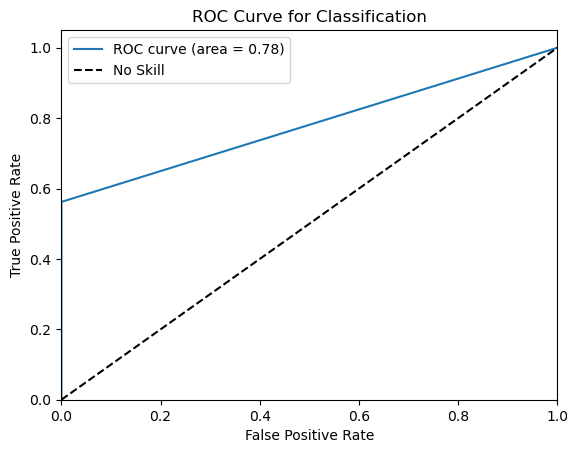

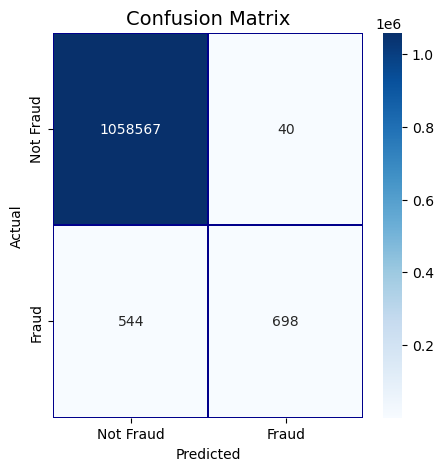

export20241119.csv
test-set confusion matrix:
 [[988794    117]
 [  1110     37]]
accuracy score: 0.9988
balanced accuracy score: 0.5161
recall score: 0.0323
precision score: 0.2403
f1 score: 0.0569
mcc score: 0.0877
roc auc score: 0.5161


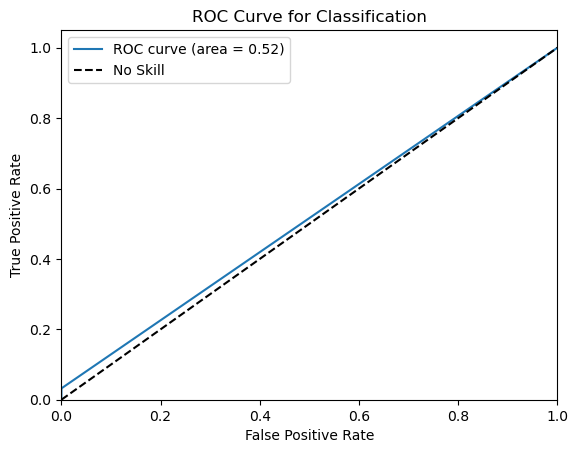

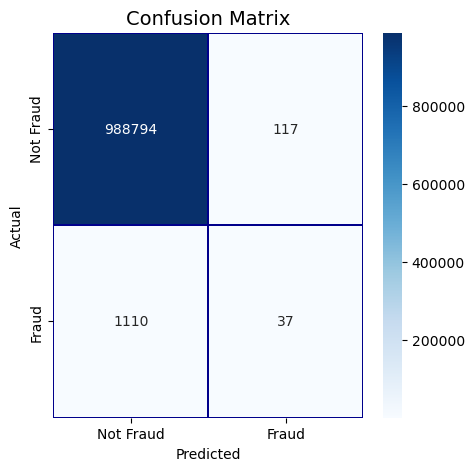

export20241120.csv
test-set confusion matrix:
 [[1067051      73]
 [   1248      70]]
accuracy score: 0.9988
balanced accuracy score: 0.5265
recall score: 0.0531
precision score: 0.4895
f1 score: 0.0958
mcc score: 0.1609
roc auc score: 0.5265


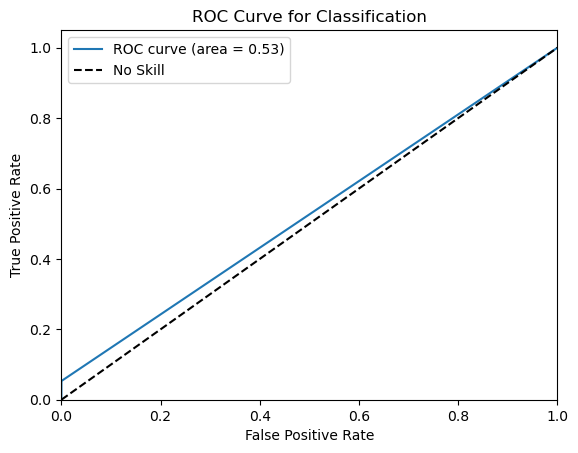

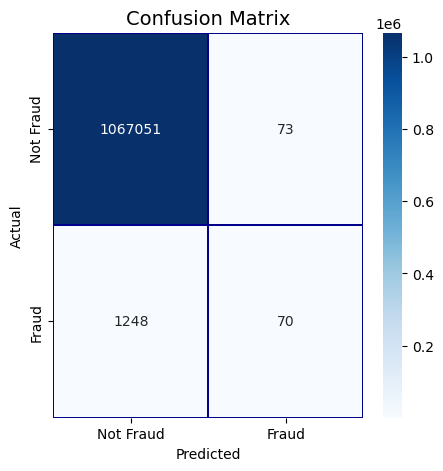

export20241121.csv
test-set confusion matrix:
 [[1075180     104]
 [   1193      21]]
accuracy score: 0.9988
balanced accuracy score: 0.5086
recall score: 0.0173
precision score: 0.1680
f1 score: 0.0314
mcc score: 0.0536
roc auc score: 0.5086


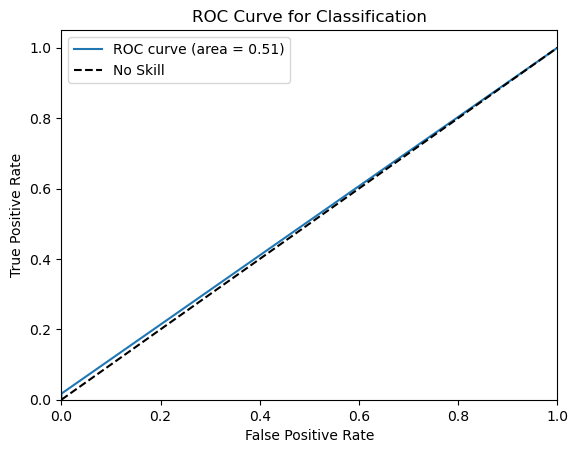

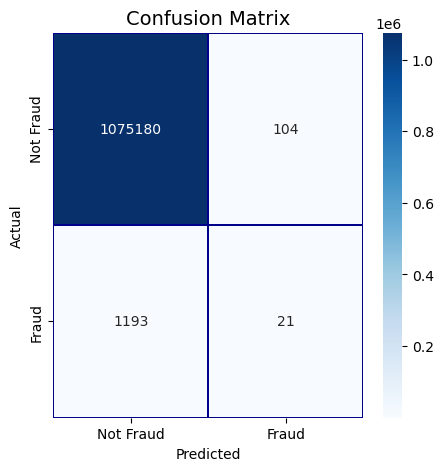

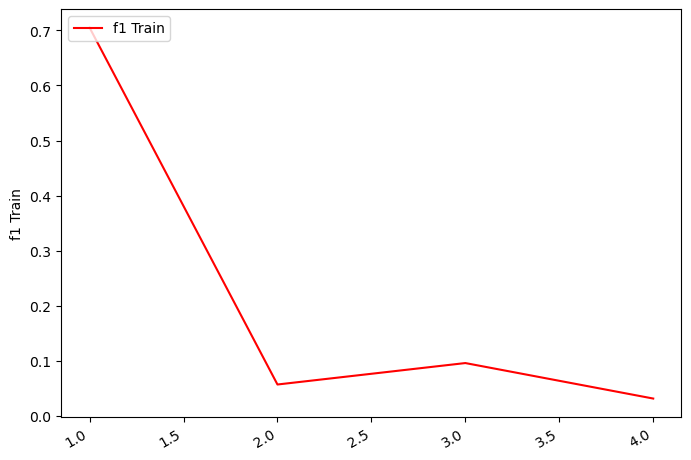

In [22]:
files = fd.getAllFiles()

range = []
f1s = []
rocs = []
loop =0
for file in files:
    loop=loop+1
    range.append(loop)
    print(file)
  
    dfTrx = pd.read_csv('../data/cleaned/'+source+file)
    predictors = fd.getPredictors(dfTrx)

    preds = modelClf.predict(dfTrx[predictors])
    y_pred_prob = modelClf.predict_proba(dfTrx[predictors])[:,1]
    y_pred_adjusted = (y_pred_prob>threshold).astype(int)

    f1,mcc,roc= fd.print_scores(dfTrx['Class'], y_pred_adjusted,'All', True)
    #fd.show_importance(modelClf,predictors)
    fd.show_confusion_matrix(dfTrx['Class'], y_pred_adjusted)
    f1s.append(f1)
    rocs.append(roc)

fd.plt_train_test(range, f1s)
resultMd.update_performance_nextdays_result('08-xgboost','XGBClassifier','3-After threshold', f1s[0],f1s[1],f1s[2],f1s[3],rocs[0],rocs[1],rocs[2],rocs[3])
